In [3]:
def read_rawb_image(image_path):
    with open(image_path, "rb") as f:
        sizes = np.fromfile(f, dtype=np.int32, count=3)
        image_data = np.fromfile(f, dtype=np.int32)
        image = image_data.reshape(sizes)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


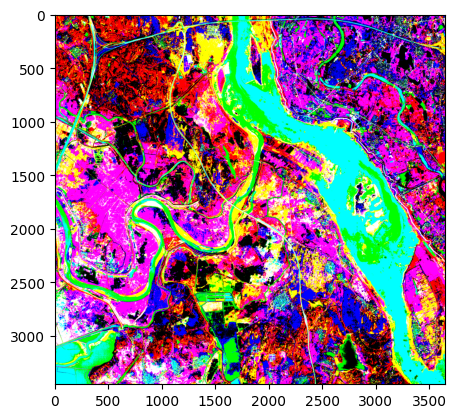

In [21]:
import numpy as np
from sklearn.decomposition import PCA


multispectral_data = read_rawb_image("/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_rawb/GF2_PMS1__L1A0000564539-MSS1_0.rawb")


height, width, n_channels = multispectral_data.shape
data_reshaped = multispectral_data.reshape(-1, 4)

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_reshaped)

# Reshape back to the original image dimensions
pca_image = pca_result.reshape(height, width, 3)

#show the image
import matplotlib.pyplot as plt
plt.imshow(pca_image)
plt.show()



(3454, 3650, 3)
float64
1116.5183226761287
-470.62481441306346
-3.1376729167778917e-16
(3454, 3650, 3)
uint8
255
0
75.11342714290625


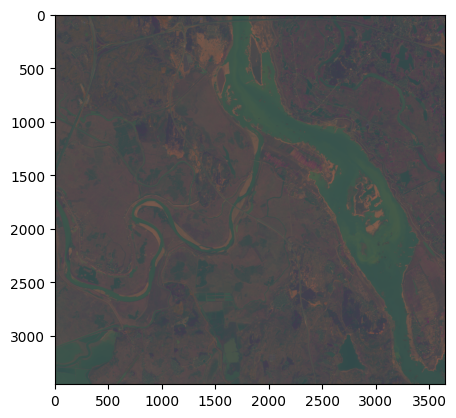

In [28]:
# show pca image values
print(pca_image.shape)
print(pca_image.dtype)
print(pca_image.max())
print(pca_image.min())
print(pca_image.mean())


# Normalize the PCA image to the range [0, 1]
min_val = pca_image.min()
max_val = pca_image.max()

normalized_pca_image = (pca_image - min_val) / (max_val - min_val)

# If you want to scale to the range [0, 255] for visualization
normalized_pca_image_255 = (normalized_pca_image * 255).astype(np.uint8)

print(normalized_pca_image_255.shape)
print(normalized_pca_image_255.dtype)
print(normalized_pca_image_255.max())
print(normalized_pca_image_255.min())
print(normalized_pca_image_255.mean())

#show the image
# make resizable window
import cv2
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow("image", normalized_pca_image_255)
cv2.waitKey(0)
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
plt.imshow(normalized_pca_image_255)
plt.show()


In [29]:
import os 

train_images_path = "/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_rawb/"
pca_images_dest = "/home/pablo.canosa/wip/datasets/small_gaofen/train/pca/"

for image in os.listdir(train_images_path):
    multispectral_data = read_rawb_image(os.path.join(train_images_path, image))
    height, width, n_channels = multispectral_data.shape
    data_reshaped = multispectral_data.reshape(-1, 4)

    # Perform PCA
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_reshaped)

    # Reshape back to the original image dimensions
    pca_image = pca_result.reshape(height, width, 3)

    # Normalize the PCA image to the range [0, 1]
    min_val = pca_image.min()
    max_val = pca_image.max()

    normalized_pca_image = (pca_image - min_val) / (max_val - min_val)

    # If you want to scale to the range [0, 255] for visualization
    normalized_pca_image_255 = (normalized_pca_image * 255).astype(np.uint8)

    

KeyboardInterrupt: 

In [31]:
def save_image(image, filename):
    print("image shape is ", image.shape)
    sizes = np.array([image.shape[0], image.shape[1], image.shape[2]])
    image_raw = np.concatenate([sizes, image.flatten()]).astype(np.int32)

    newFile = open(filename, "wb")
    image_raw.tofile(newFile, format="%d")
    newFile.close()

#TEST
multispectral_data = read_rawb_image(os.path.join(train_images_path, image))
height, width, n_channels = multispectral_data.shape
data_reshaped = multispectral_data.reshape(-1, 4)

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_reshaped)

# Reshape back to the original image dimensions
pca_image = pca_result.reshape(height, width, 3)

# Normalize the PCA image to the range [0, 1]
min_val = pca_image.min()
max_val = pca_image.max()

normalized_pca_image = (pca_image - min_val) / (max_val - min_val)

# If you want to scale to the range [0, 255] for visualization
normalized_pca_image_255 = (normalized_pca_image * 255).astype(np.uint8)

save_image(normalized_pca_image_255, "test.rawb")

image shape is  (3454, 3650, 3)


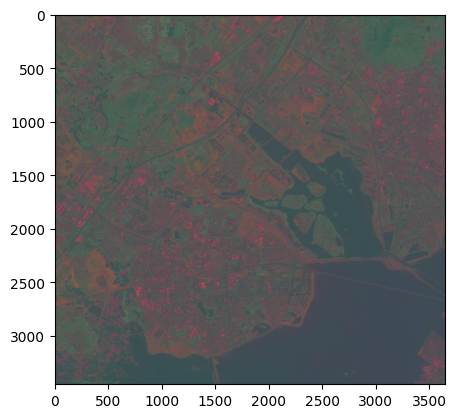

In [36]:
test = read_rawb_image("test.rawb")




#show the image
import matplotlib.pyplot as plt
plt.imshow(test)
plt.show()

import cv2

# Assuming `test` is your image
image_32f = test.astype(np.float32)

cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow("image", image_32f)
cv2.waitKey(0)
cv2.destroyAllWindows()